In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
!ls /home/lugli/spuccio/Projects/SP039/New_2024/Zeng2023/GSE241037_RAW/

GSM7714305  GSM7714307	GSM7714309  GSM7714311	GSM7714313  GSM7714315
GSM7714306  GSM7714308	GSM7714310  GSM7714312	GSM7714314  GSM7714316


In [3]:
GSM7714305 =sc.read_10x_mtx("/home/lugli/spuccio/Projects/SP039/New_2024/Zeng2023/GSE241037_RAW//GSM7714305")
GSM7714306 =sc.read_10x_mtx("/home/lugli/spuccio/Projects/SP039/New_2024/Zeng2023/GSE241037_RAW//GSM7714306")
GSM7714307 =sc.read_10x_mtx("/home/lugli/spuccio/Projects/SP039/New_2024/Zeng2023/GSE241037_RAW//GSM7714307")
GSM7714308 =sc.read_10x_mtx("/home/lugli/spuccio/Projects/SP039/New_2024/Zeng2023/GSE241037_RAW//GSM7714308")

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [4]:
GSM7714305.var_names_make_unique()
GSM7714305.obs_names_make_unique()

In [5]:
GSM7714306.var_names_make_unique()
GSM7714306.obs_names_make_unique()

In [6]:
GSM7714307.var_names_make_unique()
GSM7714307.obs_names_make_unique()

In [7]:
GSM7714308.var_names_make_unique()
GSM7714308.obs_names_make_unique()

In [8]:
GSM7714305.shape

(6794880, 33538)

In [9]:
sc.pp.filter_cells(GSM7714305, min_genes=250)

filtered out 6794099 cells that have less than 250 genes expressed


In [10]:
sc.pp.filter_cells(GSM7714306, min_genes=250)

filtered out 6792954 cells that have less than 250 genes expressed


In [11]:
sc.pp.filter_cells(GSM7714307, min_genes=250)

filtered out 6794606 cells that have less than 250 genes expressed


In [12]:
sc.pp.filter_cells(GSM7714308, min_genes=250)

filtered out 1389345 cells that have less than 250 genes expressed


In [13]:
%%time
GSM7714305=ov.pp.qc(GSM7714305,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
               doublets_method='sccomposite',
              batch_key=None)
GSM7714305

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 781
!!!It should be noted that the `sccomposite` will remove more cells than             `scrublet`!!!
Begin of post doublets removal and QC plot using `sccomposite`
Cuda is not available; Fitting the COMPOSITE model on RNA modality
The RNA modality goodness-of-fit score is: 4.821776454445218 
<3: poor fit 
3~5: moderate fit 
>5: good fit
Cells retained after sccomposite: 618, 163 removed.
End of post sccomposite removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 500; filtered-out-cells:         1
Lower treshold, n genes: 250; filtered-out-cells:         0
Lower treshold, mito %: 0.2; filtered-out-cells:         115
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 116
Cells retained after scrublet and seurat filtering: 502, 279 removed.
filtered out 20463 genes that are detected in less than 3 cells
CPU time

AnnData object with n_obs × n_vars = 502 × 13075
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells'

In [14]:
%%time
GSM7714306=ov.pp.qc(GSM7714306,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
               doublets_method='sccomposite',
              batch_key=None)
GSM7714306

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 1926
!!!It should be noted that the `sccomposite` will remove more cells than             `scrublet`!!!
Begin of post doublets removal and QC plot using `sccomposite`
Cuda is not available; Fitting the COMPOSITE model on RNA modality
The RNA modality goodness-of-fit score is: 5.490988629265216 
<3: poor fit 
3~5: moderate fit 
>5: good fit
Cells retained after sccomposite: 1256, 670 removed.
End of post sccomposite removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 500; filtered-out-cells:         1
Lower treshold, n genes: 250; filtered-out-cells:         1
Lower treshold, mito %: 0.2; filtered-out-cells:         243
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 244
Cells retained after scrublet and seurat filtering: 1012, 914 removed.
filtered out 19124 genes that are detected in less than 3 cells
CPU t

AnnData object with n_obs × n_vars = 1012 × 14414
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells'

In [15]:
%%time
GSM7714308=ov.pp.qc(GSM7714308,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
               doublets_method='sccomposite',
              batch_key=None)
GSM7714308

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 4988
!!!It should be noted that the `sccomposite` will remove more cells than             `scrublet`!!!
Begin of post doublets removal and QC plot using `sccomposite`
Cuda is not available; Fitting the COMPOSITE model on RNA modality
The RNA modality goodness-of-fit score is: 3.118597475399794 
<3: poor fit 
3~5: moderate fit 
>5: good fit
Cells retained after sccomposite: 4554, 434 removed.
End of post sccomposite removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 500; filtered-out-cells:         1271
Lower treshold, n genes: 250; filtered-out-cells:         23
Lower treshold, mito %: 0.2; filtered-out-cells:         0
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 1271
Cells retained after scrublet and seurat filtering: 3283, 1705 removed.
filtered out 20660 genes that are detected in less than 3 cells
C

AnnData object with n_obs × n_vars = 3283 × 11625
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells'

In [16]:
GSM7714305.obs['author'] = "Zeng2023"
GSM7714306.obs['author'] = "Zeng2023"
GSM7714307.obs['author'] = "Zeng2023"
GSM7714308.obs['author'] = "Zeng2023"

In [17]:
GSM7714305.obs['donor_id'] = "GSM7714305"
GSM7714306.obs['donor_id'] = "GSM7714306"
GSM7714307.obs['donor_id'] = "GSM7714307"
GSM7714308.obs['donor_id'] = "GSM7714308"

In [18]:
adata = GSM7714305.concatenate([GSM7714306,GSM7714308],index_unique=None,join="outer")

In [19]:
adata

AnnData object with n_obs × n_vars = 4797 × 26396
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells-2'

In [20]:
%%time
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,
                       target_sum=50*1e4)
adata

Begin robust gene identification
After filtration, 26396/26396 genes are kept.     Among 26396 genes, 26396 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['Gm42418', 'MALAT1']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 1.4522631168365479 seconds.
End of size normalization: shiftlog and HVGs selection pearson
CPU times: user 4.07 s, sys: 152 ms, total: 4.22 s
Wall time: 1.58 s


AnnData object with n_obs × n_vars = 4797 × 26396
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [21]:
X_counts_recovered, size_factors_sub=ov.pp.recover_counts(adata.X, 50*1e4, 50*1e5, log_base=None, 
                                                          chunk_size=10000)
adata.layers['recover_counts']=X_counts_recovered

100%|██████████| 4797/4797 [00:08<00:00, 565.32it/s]


In [22]:
%%time
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

CPU times: user 13.5 ms, sys: 3.97 ms, total: 17.5 ms
Wall time: 15.7 ms


View of AnnData object with n_obs × n_vars = 4797 × 2000
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg'
    layers: 'counts', 'recover_counts'

In [23]:
%%time
ov.pp.scale(adata)
adata

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
CPU times: user 504 ms, sys: 11.9 ms, total: 516 ms
Wall time: 249 ms


AnnData object with n_obs × n_vars = 4797 × 2000
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg'
    layers: 'counts', 'recover_counts', 'scaled'

In [24]:
%%time
ov.pp.pca(adata,layer='scaled',n_pcs=50)
adata

computing PCA
    with n_comps=50
    finished (0:00:00)
CPU times: user 2.58 s, sys: 7.32 s, total: 9.9 s
Wall time: 510 ms


AnnData object with n_obs × n_vars = 4797 × 2000
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'recover_counts', 'scaled'

In [25]:
%%time
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
CPU times: user 10.2 s, sys: 2.85 s, total: 13.1 s
Wall time: 5.65 s


In [26]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:09)
CPU times: user 9.78 s, sys: 2.97 s, total: 12.8 s
Wall time: 9.48 s


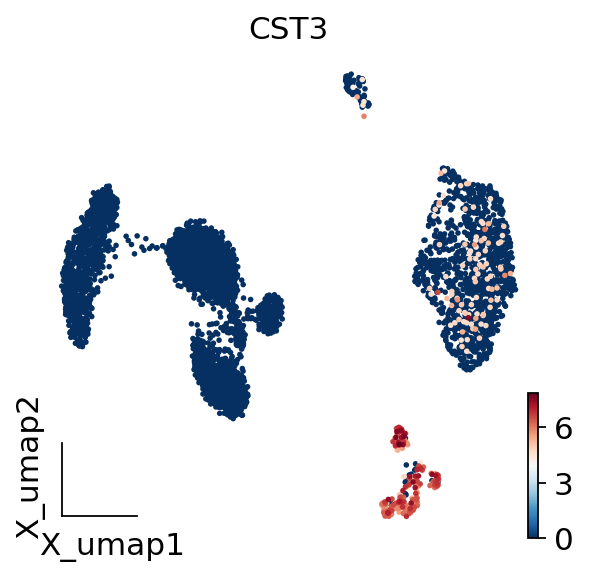

In [27]:
ov.pl.embedding(adata,
                basis='X_umap',
                color='CST3',
                frameon='small')

In [28]:
adata_raw=adata.raw.to_adata()
ov.pp.score_genes_cell_cycle(adata_raw,species='human')

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    773 total control genes are used. (0:00:00)
computing score 'G2M_score'
       'CDCA2', 'NEK2', 'CENPA'],
      dtype='object')
    finished: added
    'G2M_score', score of gene set (adata.obs).
    774 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


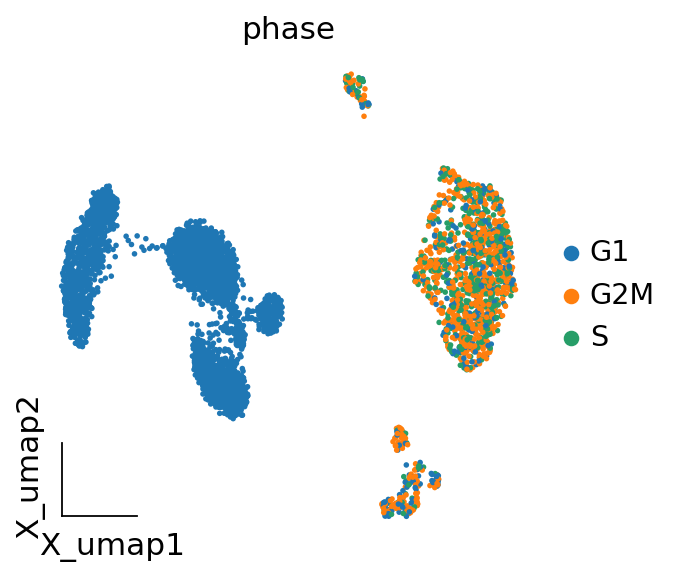

In [29]:
ov.pl.embedding(adata_raw,
                basis='X_umap',
                color='phase',
                frameon='small')

In [30]:
ov.pp.leiden(adata,resolution=1)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


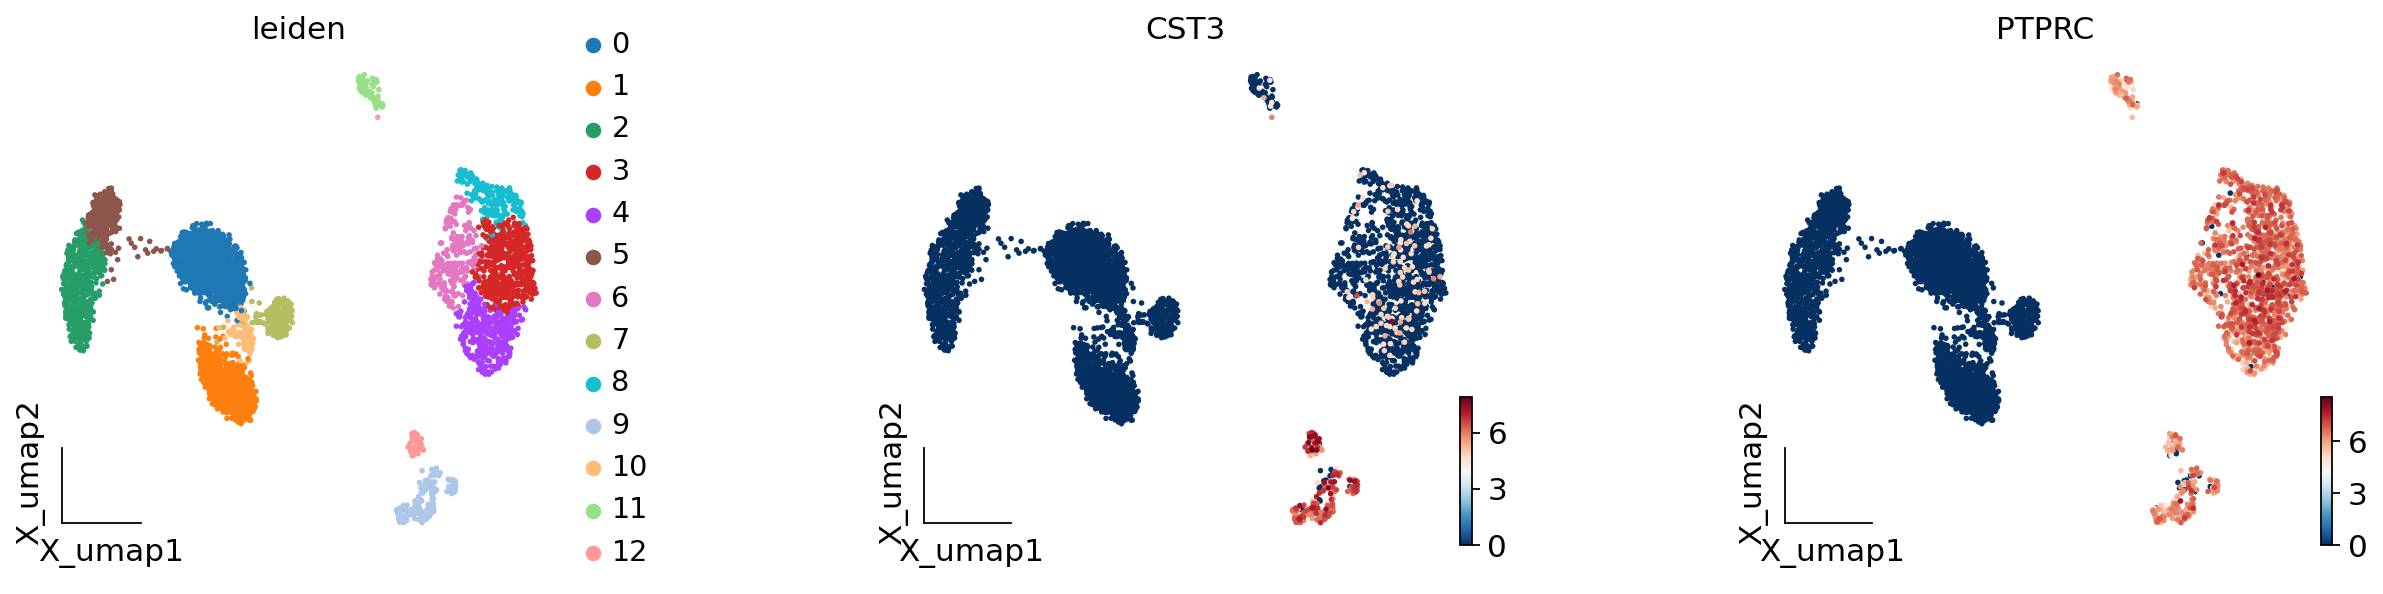

In [31]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'CST3', 'PTPRC'],
                frameon='small',wspace=0.5)

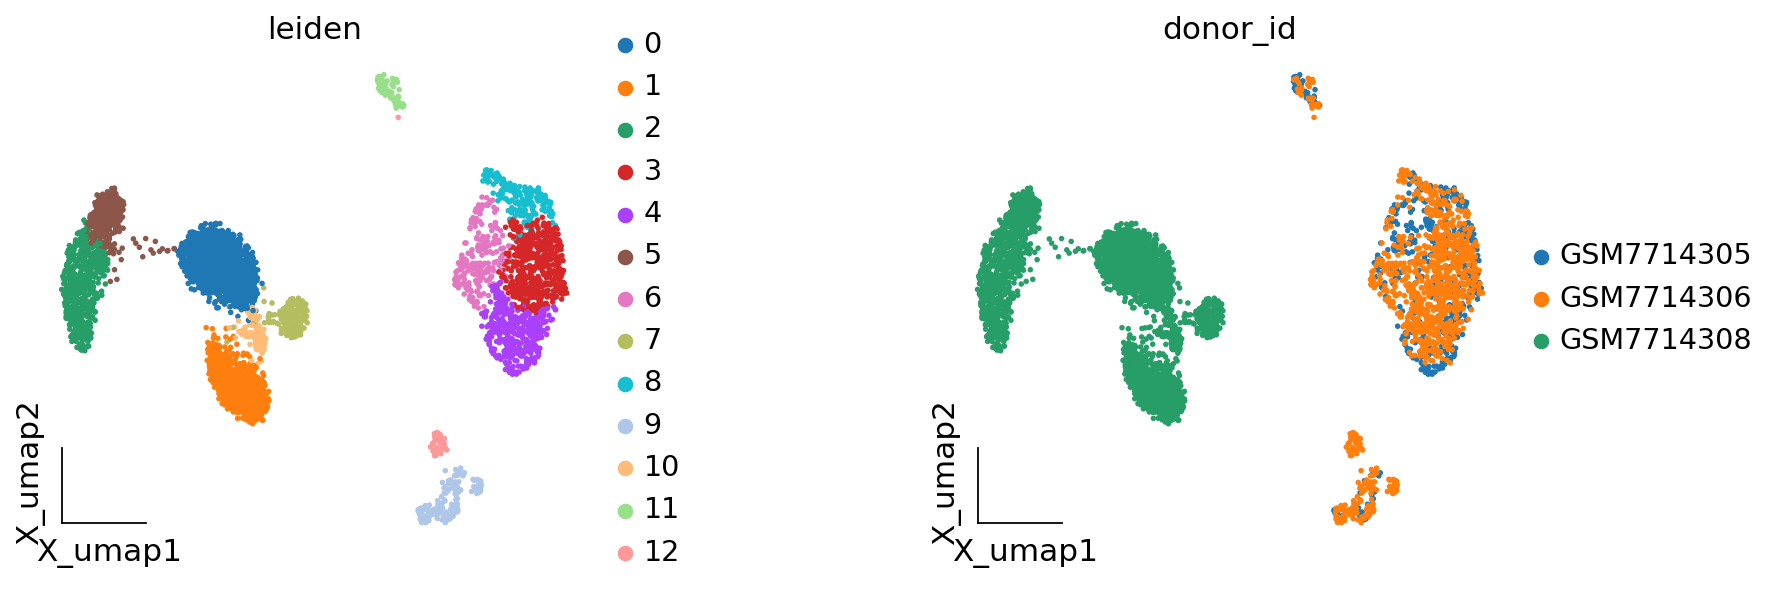

In [32]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [33]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Zeng2023_Part1.h5ad")

TypeError: Can't implicitly convert non-string objects to strings

In [141]:
adata

AnnData object with n_obs × n_vars = 4797 × 2000
    obs: 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'author', 'donor_id', 'batch', 'leiden'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'donor_id_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'recover_counts', 'scaled'
    obsp: 'distances', 'connectivities'